In [ ]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

# 1. load all paper data

In [ ]:
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [ ]:
def load_files(dirname):
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

In [ ]:
biorxiv_dir = 'C:/Users/D. RHUTHVIK/Desktop/ML/proj data/biorxiv_medrxiv/pdf_json/'
filenames = os.listdir(biorxiv_dir)
print("Number of articles retrieved from biorxiv:", len(filenames))

Number of articles retrieved from biorxiv: 1625


In [ ]:
all_files = []

for filename in filenames:
    filename = biorxiv_dir + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [ ]:
file = all_files[1]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [ ]:
pprint(file['abstract'])

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'During the past three months, a new coronavirus (SARS-CoV-2) '
          'epidemic has been growing exponentially, affecting over 100 '
          'thousand people worldwide, and causing enormous distress to '
          'economies and societies of affected countries. A plethora of '
          'analyses based on viral sequences has already been published, in '
          'scientific journals as well as through non-peer reviewed channels, '
          'to investigate SARS-CoV-2 genetic heterogeneity and spatiotemporal '
          'dissemination. We examined all full genome sequences currently '
          'available to assess the presence of sufficient information for '
          'reliable phylogenetic and phylogeographic studies. Our analysis '
          'clearly shows severe limitations in the present data, in light of '
          'which any finding should be considered, at the very best, '
          'preliminary an

In [ ]:
texts = [(di['section'], di['text']) for di in file['body_text']]
texts_di = {di['section']: "" for di in file['body_text']}
for section, text in texts:
    texts_di[section] += text

pprint(list(texts_di.keys()))

['',
 'Inhomogeneous sampling and phylogeographic uncertainly',
 'Sequencing errors and phylogenetic noise',
 'Conclusions and Future directions',
 'Data',
 'Phylogenetic signal and ML phylogeny inference',
 'Acknowledgments',
 'EPI_ISL_402130_BetaCoV_Wuhan_WIV07_2019',
 'EPI_ISL_402121_BetaCoV_Wuhan_IVDC-HB-05_2019']


In [ ]:
body = ""

for section, text in texts_di.items():
    body += section
    body += "\n\n"
    body += text
    body += "\n\n"

print(body[:3000])



In December 2019, a novel coronavirus, SARS-CoV-2, was identified in Wuhan, China, as the etiologic agent of coronavirus disease 2019 , which by March 2020 has already spread across more than 80 countries 1 . Common symptoms of infection include fever, cough, and shortness of breath, while severe cases are characterized by advanced respiratory distress and pneumonia, often resulting in death 2 . Soon after the first epidemiological data together with SARS-CoV-2 genetic sequences were made available, a glut of phylogeny-based analyses began to circulate discussing, in scientific papers as well as (social) media, countries that might have been fueling the spread. The implications of misunderstanding the real dynamic of the COVID-19 pandemic are extremely dangerous. Ethnic or social discrimination resulting from unsupported assumptions on viral contagion -often amplified by irresponsible, uncontrollable communications -can be highly damaging for people and countries.Despite (social) med

In [ ]:
print(format_body(file['body_text'])[:3000])



In December 2019, a novel coronavirus, SARS-CoV-2, was identified in Wuhan, China, as the etiologic agent of coronavirus disease 2019 , which by March 2020 has already spread across more than 80 countries 1 . Common symptoms of infection include fever, cough, and shortness of breath, while severe cases are characterized by advanced respiratory distress and pneumonia, often resulting in death 2 . Soon after the first epidemiological data together with SARS-CoV-2 genetic sequences were made available, a glut of phylogeny-based analyses began to circulate discussing, in scientific papers as well as (social) media, countries that might have been fueling the spread. The implications of misunderstanding the real dynamic of the COVID-19 pandemic are extremely dangerous. Ethnic or social discrimination resulting from unsupported assumptions on viral contagion -often amplified by irresponsible, uncontrollable communications -can be highly damaging for people and countries.Despite (social) med

In [ ]:
print(all_files[0]['metadata'].keys())

dict_keys(['title', 'authors'])


In [ ]:
authors = all_files[0]['metadata']['authors']
pprint(authors[:3])

[{'affiliation': {},
  'email': '',
  'first': 'Joseph',
  'last': 'Ward',
  'middle': ['C'],
  'suffix': ''},
 {'affiliation': {},
  'email': '',
  'first': 'Lidia',
  'last': 'Lasecka-Dykes',
  'middle': [],
  'suffix': ''},
 {'affiliation': {},
  'email': '',
  'first': 'Chris',
  'last': 'Neil',
  'middle': [],
  'suffix': ''}]


In [ ]:
for author in authors:
    print("Name:", format_name(author))
    print("Affiliation:", format_affiliation(author['affiliation']))
    print()

Name: Joseph C Ward
Affiliation: 

Name: Lidia Lasecka-Dykes
Affiliation: 

Name: Chris Neil
Affiliation: 

Name: Oluwapelumi Adeyemi
Affiliation: 

Name: Sarah 
Affiliation: 

Name:  Gold
Affiliation: 

Name: Niall Mclean
Affiliation: 

Name: Caroline Wright
Affiliation: 

Name: Morgan R Herod
Affiliation: 

Name: David Kealy
Affiliation: 

Name: Emma 
Affiliation: 

Name: Warner 
Affiliation: 

Name: Donald P King
Affiliation: 

Name: Tobias J Tuthill
Affiliation: 

Name: David J Rowlands
Affiliation: 

Name: Nicola J 
Affiliation: 

Name: Stonehouse A#
Affiliation: 



In [ ]:
cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

  0%|          | 0/1625 [00:00<?, ?it/s]

In [ ]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...","Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...",Abstract\n\nword count: 194 22 Text word count...,"\n\nVP3, and VP0 (which is further processed t...",Genetic economy in 598 picornaviruses: Foot-an...,"[{'first': 'Joseph', 'middle': ['C'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Genetic..."
1,00340eea543336d54adda18236424de6a5e91c9d,Analysis Title: Regaining perspective on SARS-...,"Carla Mavian, Simone Marini, Costanza Manes, I...","Carla Mavian (University of Florida, Gainesvil...","Abstract\n\nDuring the past three months, a ne...","\n\nIn December 2019, a novel coronavirus, SAR...","Situation Report -43, , Coronavirus disease 20...","[{'first': 'Carla', 'middle': [], 'last': 'Mav...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Situati..."
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H..."
3,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica..."
4,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen..."


In [ ]:
noncomm_dir = 'C:/Users/D. RHUTHVIK/Desktop/ML/proj data/noncomm_use_subset/pdf_json/'
noncomm_files = load_files(noncomm_dir)
noncomm_df = generate_clean_df(noncomm_files)
noncomm_df.to_csv('noncomm_use_form.csv', index=False)
noncomm_df.head()

  0%|          | 0/2490 [00:00<?, ?it/s]

  0%|          | 0/2490 [00:00<?, ?it/s]

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0036b28fddf7e93da0970303672934ea2f9944e7,The fecal microbiota and unconjugated fecal bi...,"B Ruggerone, A C Manchester, F Del Baldo, F Fr...","B Ruggerone (University of Thessaly, Karditsa,...",Abstract\n\nand Blautia (P = 0.008) significan...,\n\nhuman type 1 DM. The aim of this study was...,Significant Feline Proteinuria: a retrospectiv...,"[{'first': 'B', 'middle': [], 'last': 'Ruggero...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Signifi..."
1,004f0f69464edd5466a947da86d38cea9fe7e4fe,Human Pregnancy Specific Beta-1-Glycoprotein 1...,"Cam T Ha, Julie A Wu, Ster Irmak, Felipe A Lis...",Cam T Ha (Uniformed Services University of the...,Abstract\n\nPrevious studies suggest that huma...,INTRODUCTION\n\nPregnancy specific beta-1-glyc...,Detection and characterization of pregnancy pr...,"[{'first': 'Cam', 'middle': ['T'], 'last': 'Ha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Detecti..."
2,005c43980edf3fcc2a4d12ee7ad630ddb651ce6e,Development of a smartphone-based rapid dual f...,"Seon-Ju Yeo, Homan Kang, Tung Duy Dao, Thi Bui...","Seon-Ju Yeo (Wonkwang University, 570-749, Iks...",Abstract\n\nAccurate and rapid diagnosis of hi...,Introduction\n\nAvian influenza (AI) viruses a...,"Avian and other zoonotic influenza, , , 2018; ...","[{'first': 'Seon-Ju', 'middle': [], 'last': 'Y...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Avian a..."
3,00676f1131e03ca8defe523e79bc1635cc933909,Dromedary camels in northern Mali have high se...,"Darryl Falzarano, Badian Kamissoko, Emmie De W...","Darryl Falzarano (Rocky Mountain Laboratories,...",Abstract\n\nA high percentage (up to 90%) of d...,Introduction\n\nDromedary camels (Camelus drom...,Human infection with MERS coronavirus after ex...,"[{'first': 'Darryl', 'middle': [], 'last': 'Fa...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Human i..."
4,006be99e337c84b8758591a54f0362353b24dfde,Regulated Export of a Secretory Protein from t...,Stephen S Macintyre,Stephen S Macintyre (Case Western Reserve Univ...,"Abstract\n\n253 protein, C-reactive protein (C...",\n\nAbstract. The half-time for secretion of t...,Studies on the binding specificity of human C-...,"[{'first': 'Stephen', 'middle': ['S'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Studies..."


In [ ]:
comm_dir = 'C:/Users/D. RHUTHVIK/Desktop/ML/proj data/comm_use_subset/pdf_json/'
comm_files = load_files(comm_dir)
comm_df = generate_clean_df(comm_files)
comm_df.to_csv('comm_use_form.csv', index=False)
comm_df.head()

  0%|          | 0/9524 [00:00<?, ?it/s]

  0%|          | 0/9524 [00:00<?, ?it/s]

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,"Julien Mélade, Nicolas Wieseke 4#, Beza Ramazi...","Julien Mélade (2 rue Maxime Rivière, 97490 Sai...",,\n\n- Figure S1 : Phylogeny of all sequences b...,"NDV/HQ266603/Chicken/1992, , , None; MuV/FJ375...","[{'first': 'Julien', 'middle': [], 'last': 'Mé...","{'BIBREF32': {'ref_id': 'b32', 'title': 'NDV/H..."
1,00142f93c18b07350be89e96372d240372437ed9,immunity to pathogens taught by specialized hu...,"Elisabetta Padovan, Marina Cella, Shahram Sale...","Elisabetta Padovan, Marina Cella, Shahram Sale...",Abstract\n\nDendritic cells (DCs) are speciali...,\n\niNTRODUCTiON Human beings are constantly e...,The dendritic cell system and its role in immu...,"[{'first': 'Elisabetta', 'middle': [], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The den..."
2,0022796bb2112abd2e6423ba2d57751db06049fb,Public Health Responses to and Challenges for ...,"Elvina Viennet, Scott A Ritchie, Craig R Willi...",Elvina Viennet (The Australian National Univer...,Abstract\n\nDengue has a negative impact in lo...,Introduction\n\nPathogens and vectors can now ...,"The global distribution and burden of dengue, ...","[{'first': 'Elvina', 'middle': [], 'last': 'Vi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The glo..."
3,0031e47b76374e05a18c266bd1a1140e5eacb54f,The fecal microbiota of healthy donor horses a...,"Caroline A Mckinney Id, Bruno C M Oliveira, Da...",Caroline A Mckinney Id (Cummings School of Vet...,Abstract\n\nFecal microbial transplantation (F...,\n\na1111111111 a1111111111 a1111111111 a11111...,Characteristics and risk factors for failure o...,"[{'first': 'Caroline', 'middle': ['A'], 'last'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Charact..."
4,00326efcca0852dc6e39dc6b7786267e1bc4f194,a section of the journal Frontiers in Pediatri...,"Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Abstract\n\nFifteen years ago, United Nations ...",\n\nIn addition to preventative care and nutri...,"Global, regional, and national levels of neona...","[{'first': 'Jan', 'middle': ['Hau'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Global,..."


In [ ]:
pmc_dir = 'C:/Users/D. RHUTHVIK/Desktop/ML/proj data/custom_license/pdf_json/'
pmc_files = load_files(pmc_dir)
pmc_df = generate_clean_df(pmc_files)
pmc_df.to_csv('pmc_form.csv', index=False)
pmc_df.head()

  0%|          | 0/26505 [00:00<?, ?it/s]

  0%|          | 0/26505 [00:00<?, ?it/s]

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,"E Cornelissen, H L Dewerchin, E Van Hamme, H J...","E Cornelissen (Ghent University, Salisburylaan...",Abstract\n\nFeline infectious peritonitis viru...,Introduction\n\nFeline infectious peritonitis ...,Using direct immunofluorescence to detect coro...,"[{'first': 'E', 'middle': [], 'last': 'Corneli...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Using d..."
1,00016663c74157a66b4d509d5c4edffd5391bbe0,,,,,Introduction\n\nViruses are increasingly recog...,"Principles of Virology in Fields Virology, R C...",[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Princip..."
2,0005d253951fedc237715a37db147032eea28912,,,,,\n\nSynthesized by William Prusoff in the late...,Molecular basis of interferon resistance in he...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul..."
3,00060fb61742ff60e4e3ba4648c74a34cfe9560d,,"Jesi Kim, Todd Thomsen, Naomi Sell, Andrew J G...","Jesi Kim (Harvard Medical School, Boston, MA, ...",,Introduction\n\nThe outbreak of a novel corona...,An interactive web-based dashboard to track CO...,"[{'first': 'Jesi', 'middle': [], 'last': 'Kim'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'An inte..."
4,00073cb65dd2596249230fab8b15a71c4a135895,Risk Parameters of Fulminant Acute Respiratory...,"Shoji Kawachi, San Thi Luong, Mika Shigematsu,...","Shoji Kawachi, San Thi Luong (National Hospita...",Abstract\n\nA clinical picture of patients wit...,"\n\nSince then, many clinical case reports hav...",Characterization of avian H5N1 influenza virus...,"[{'first': 'Shoji', 'middle': [], 'last': 'Kaw...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Charact..."


In [ ]:
meta=pd.read_csv('C:/Users/D. RHUTHVIK/Desktop/ML/proj data/metadata.csv')

In [ ]:
merge_final= clean_df.append(noncomm_df, ignore_index=True)
merge_final= clean_df.append(comm_df, ignore_index=True)
merge_final= clean_df.append(pmc_df, ignore_index=True)
merge_final.tail()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
28125,fff60988428b82658458d381a6c27583209a686e,Development of A Loop-Mediated Isothermal Ampl...,"Kuiyu Jiang, Ying Zhu, Wenxin Liu, Yufei Feng,...","Kuiyu Jiang, Ying Zhu, Wenxin Liu, Yufei Feng,...",Abstract\n\nThe objective of this study was to...,Introduction\n\nAdhesion fimbria play an impor...,"Enterotoxins in acute infective diarrhoea, D W...","[{'first': 'Kuiyu', 'middle': [], 'last': 'Jia...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Enterot..."
28126,fff69e4894df7b4134bb2ddc830764459ac3edbe,INTERACTION BETWEEN THE SPIKE PROTEIN OF HUMAN...,"Stefan Pöhlmann, Thomas Gramberg, Anja Wegele,...","Stefan Pöhlmann, Thomas Gramberg, Anja Wegele,...",,INTRODUCTION\n\nCoronavirus (CoV) infection of...,"Identification of a new human coronavirus, L V...","[{'first': 'Stefan', 'middle': [], 'last': 'Pö...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Identif..."
28127,fff6fe12beb51ee2641ddb5381378ff3560d8103,Health shocks and their long-lasting impact on...,"Jorge M Agüero, Trinidad Beleche","Jorge M Agüero (University of Connecticut, 365...","Abstract\n\nWorldwide, the leading causes of d...","Introduction\n\nWorldwide, the adoption of low...",All specifications include time and state fixe...,"[{'first': 'Jorge', 'middle': ['M'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'All spe..."
28128,fff6febdd287d474d7950b14faa899c4095557b3,,"Puri, Vinod K Puri","Puri, Vinod K Puri",,"\n\npneumonia had not been the ""friend of the ...",Perspectives by family members of the dying ex...,"[{'first': '', 'middle': [], 'last': 'Puri', '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Perspec..."
28129,fffdca958d2869303da6e8e5e4b181e5de8f3854,History of protein crystallography in China,Zihe Rao,"Zihe Rao (Chinese Academy of Sciences, 100101,...",Abstract\n\nChina has a strong background in X...,INTRODUCTION\n\nThere are many records about c...,"An overview of structural genomics, S K Burley...","[{'first': 'Zihe', 'middle': [], 'last': 'Rao'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'An over..."


In [ ]:
merge2=pd.merge(merge_final,meta, left_on='title', right_on=['title'])
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,abstract_y,publish_time,authors_y,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,We integrate the human movement and healthcare...,2020-02-12,Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,ABSTRARCTThe fast accumulation of viral metage...,2020-03-27,Jiayu Shang; Yanni Sun,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,AbstractInfectious bronchitis (IB) causes sign...,2019-05-10,Salman L. Butt; Eric C. Erwood; Jian Zhang; Ho...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/634600
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract\n\nNipah Virus (NiV) came into limeli...,Introduction\n\nNipah is an infectious negativ...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,AbstractBackgroundNipah Virus (NiV) came into ...,2020-03-12,Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract\n\nBackground: A novel coronavirus (2...,"Introduction\n\nIn December 2019, a cluster of...",A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,Background: A novel coronavirus (2019-nCoV) em...,2020-02-05,Shengjie Lai; Isaac Bogoch; Nick Ruktanonchai;...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479


# 2. visualising the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
merge2['abstract_word_count'] = merge2['abstract_x'].apply(lambda x: len(x.strip().split()))
merge2['body_word_count'] = merge2['text'].apply(lambda x: len(x.strip().split()))
merge2['title_count'] = merge2['title'].apply(lambda x: len(x.strip().split()))
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_word_count,body_word_count,title_count
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111,0,756,8
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001,140,5238,11
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/634600,1634,4040,15
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract\n\nNipah Virus (NiV) came into limeli...,Introduction\n\nNipah is an infectious negativ...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918,324,2456,9
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract\n\nBackground: A novel coronavirus (2...,"Introduction\n\nIn December 2019, a cluster of...",A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479,23,4682,18


In [ ]:
merge2.drop_duplicates(subset ="title", keep = False, inplace = True)

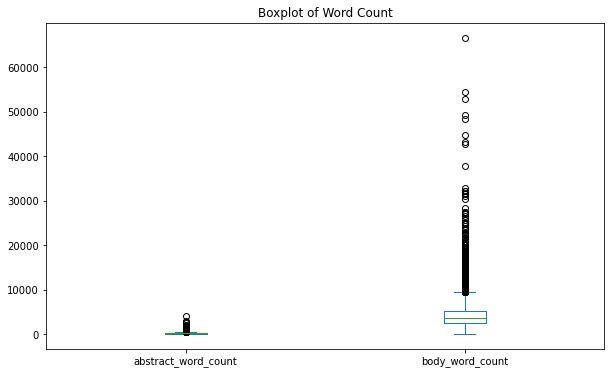

In [ ]:
merge2[['abstract_word_count', 'body_word_count']].plot(kind='box', title='Boxplot of Word Count', figsize=(10,6))
plt.show()

In [ ]:
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_word_count,body_word_count,title_count
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111,0,756,8
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001,140,5238,11
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/634600,1634,4040,15
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract\n\nNipah Virus (NiV) came into limeli...,Introduction\n\nNipah is an infectious negativ...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918,324,2456,9
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract\n\nBackground: A novel coronavirus (2...,"Introduction\n\nIn December 2019, a cluster of...",A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,NaN,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479,23,4682,18


In [ ]:
merge2.dropna(how='any')

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_word_count,body_word_count,title_count
72,136ee862ad53b606c8f2bea917b9705f5079e88e,Risk Assessment of Novel Coronavirus COVID-19 ...,"Péter Boldog, Tamás Tekeli, Zsolt Vizi, Attila...","Péter Boldog (University of Szeged, H-6720, Sz...",Abstract\n\nWe developed a computational tool ...,Introduction\n\nA cluster of pneumonia cases i...,Clinical features of patients infected with 20...,"[{'first': 'Péter', 'middle': [], 'last': 'Bol...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Clinica...",axljtddn,...,J Clin Med,3.005847e+09,#1328,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,214,4380,9
164,2afff5fe89a3e3ec270a41c2b929dfeec68d7d50,Real-Time Estimation of the Risk of Death from...,"Sung-Mok Jung, Andrei R Akhmetzhanov, Katsuma ...","Sung-Mok Jung (Hokkaido University, Kita 15 Jo...",Abstract\n\nThe exported cases of 2019 novel c...,"Introduction\n\nSince 8 December, 2019, cluste...",World Health Organization. Novel Coronavirus-C...,"[{'first': 'Sung-Mok', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",aw9qssgi,...,J Clin Med,3.005847e+09,#965,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,242,3788,16
1273,056c87819f3f095fea548192d3c2f0a072f529a6,Coronavirus: Stehen wir am Beginn einer neuen ...,,,,Hohe Mutationsraten und geringe Wirtsspezifitä...,A Novel Coronavirus from Patients with Pneumon...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",7jgrdmhc,...,MMW Fortschr Med,3.005035e+09,#144,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,0,609,8
1783,0dca038ac8dfd45a921b7cd9f1c90a8554799e23,Epidemiological and clinical characteristics o...,"Nanshan Chen, Min Zhou, Xuan Dong, Jieming Qu,...","Nanshan Chen, Min Zhou, Xuan Dong, Jieming Qu,...","Abstract\n\nBackground In December, 2019, a pn...","Introduction\n\nSince Dec 8, 2019, several cas...",Outbreak of pneumonia of unknown etiology in W...,"[{'first': 'Nanshan', 'middle': [], 'last': 'C...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Outbrea...",m40kwgcg,...,The Lancet,3.002108e+09,#78,True,False,custom_license,https://doi.org/10.1016/s0140-6736(20)30211-7,198,3270,18
2212,15ef80e5c5a736ab6234ac18fd8d2798befcabf8,Characteristics of COVID-19 infection in Beijing,"S Tian, N Hu, J Lou","S Tian, N Hu, J Lou",Abstract\n\nBackground: Since the first case o...,Evidence before this study\n\nWe searched PubM...,World experts and funders set priorities for C...,"[{'first': 'S', 'middle': [], 'last': 'Tian', ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World e...",k3f7ohzg,...,Journal of Infection,3.005680e+09,#2148,True,False,custom_license,https://doi.org/10.1016/j.jinf.2020.02.018,360,2327,6
2350,18acb42cf96716cbb91dd26e491e253cc130cb78,Isolation and characterization of a bat SARS-l...,"Xing-Yi Ge, Jia-Lu Li, Xing-Lou Yang, Aleksei ...","Xing-Yi Ge (Chinese Academy of Sciences, 43007...",Abstract\n\nThe 2002-3 pandemic caused by seve...,\n\nRs3367. These viruses are far more closely...,A novel coronavirus associated with severe acu...,"[{'first': 'Xing-Yi', 'middle': [], 'last': 'G...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A novel...",mweeepam,...,Nature,1.993578e+09,#1398,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,25,3825,13
3960,355c5a162c9805ae95ba97ff982f9e9777122309,Effect of TLR agonist on infections bronchitis...,"Bal Krishan Sharma, Naresh Kumar Kakker, Saksh...","Bal Krishan Sharma, Naresh Kumar Kakker (Lala ...",Abstract\n\nAvian infectious bronchitis (IB) i...,Introduction\n\nAvian infectious bronchitis (I...,Cytokine gene expression patterns associated w...,"[{'first': 'Bal', 'middle': [], 'last': 'Krish...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Cytokin...",riq8p5u0,...,Molecular Immunology,3.006186e+09

In [ ]:
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(merge2))):
    # split by space into list, take the first x intex, join with space
    text = merge2.iloc[ii]['text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(merge2.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

  0%|          | 0/12862 [00:00<?, ?it/s]

In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 12862

{'de': 11, 'en': 12763, 'es': 50, 'fr': 22, 'it': 5, 'nl': 11}


In [ ]:
import matplotlib.pyplot as plt

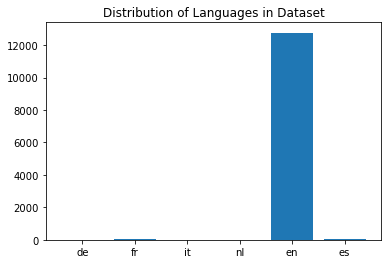

In [ ]:
merge2['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [ ]:
merge2 = merge2[merge2['language'] == 'en'] 
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12763 entries, 0 to 14196
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   paper_id                     12763 non-null  object 
 1   title                        12763 non-null  object 
 2   authors_x                    12763 non-null  object 
 3   affiliations                 12763 non-null  object 
 4   abstract_x                   12763 non-null  object 
 5   text                         12763 non-null  object 
 6   bibliography                 12763 non-null  object 
 7   raw_authors                  12763 non-null  object 
 8   raw_bibliography             12763 non-null  object 
 9   cord_uid                     12763 non-null  object 
 10  sha                          12758 non-null  object 
 11  source_x                     12763 non-null  object 
 12  doi                          12737 non-null  object 
 13  pmcid           

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

# 3. Preprocessing and EDA

In [ ]:
import re 
def clean_dataset(text):
    text=re.sub('[\[].*?[\]]', '', str(text))  #remove in-text citation
    text=re.sub(r'^https?:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)#remove hyperlink
    text=re.sub(r'\\b[A-Z a-z 0-9._ - ]*[@](.*?)[.]{1,3} \\b', '', text)#remove email
    text = re.sub("\n"," ",text)
    text=re.sub(r'  +', ' ',text ) #remove extra space
    text=re.sub('[,\.!?'']', '', text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub(r'[^\w\s]','',text) #strip punctuations (recheck)
    
    
    return text

In [ ]:
import warnings
import string
warnings.filterwarnings('ignore')
merge2['text'] =merge2['text'].apply(clean_dataset)
merge2['title'] =merge2['title'].apply(clean_dataset)
merge2['abstract_x'] =merge2['abstract_x'].apply(clean_dataset)
merge2['text'] = merge2['text'].map(lambda x: x.lower())
cleanmerge=merge2.reset_index(drop=True)
cleanmerge.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_word_count,body_word_count,title_count,language
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcareresourceadjusted vulnerabilities tow...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,introduction the 2019ncov epidemic has spread ...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111,0,756,8,en
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER hierarCHical taxonomic classification fo...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract The fast accumulation of viral metage...,introduction metagenomic sequencing which allo...,Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001,140,5238,11,en
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Realtime MinIONbased amplicon sequencing for l...,"Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract Infectious bronchitis IB causes signi...,introduction infectious bronchitis ib which is...,Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/634600,1634,4040,15,en
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract Nipah Virus NiV came into limelight r...,introduction nipah is an infectious negativese...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918,324,2456,9,en
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,NaN,NaN,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479,23,4682,18,en


In [ ]:
import string
import en_core_web_sm
import en_core_web_lg

In [ ]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['so',
 'else',
 'thru',
 'hundred',
 'must',
 'an',
 'beyond',
 'other',
 'first',
 'then']

In [ ]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI','abstract','introduction'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [ ]:
parser = en_core_web_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000
i=0
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
tqdm.pandas()
merge2["processed_text"] = merge2["abstract_x"].progress_apply(spacy_tokenizer)
merge2["processed_title"] = merge2["title"].progress_apply(spacy_tokenizer)

  0%|          | 0/12763 [00:00<?, ?it/s]

  0%|          | 0/12763 [00:00<?, ?it/s]

In [ ]:
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_word_count,body_word_count,title_count,language,processed_text,processed_title
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcareresourceadjusted vulnerabilities tow...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,introduction the 2019ncov epidemic has spread ...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111,0,756,8,en,,healthcareresourceadjusted vulnerabilities 201...
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER hierarCHical taxonomic classification fo...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract The fast accumulation of viral metage...,introduction metagenomic sequencing which allo...,Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001,140,5238,11,en,fast accumulation viral metagenomic data contr...,cheer hierarchical taxonomic classification vi...
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Realtime MinIONbased amplicon sequencing for l...,"Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract Infectious bronchitis IB causes signi...,introduction infectious bronchitis ib which is...,Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,True,False,biorxiv_medrxiv,https://doi.org/10.1101/634600,1634,4040,15,en,infectious bronchitis ib causes significant ec...,realtime minionbased amplicon sequencing linea...
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract Nipah Virus NiV came into limelight r...,introduction nipah is an infectious negativese...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918,324,2456,9,en,nipah virus niv came limelight recently outbre...,combined evidence approach prioritize nipah vi...
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,True,False,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479,23,4682,18,en,background novel coronavirus 2019ncov emerged ...,assessing spread risk wuhan novel coronavirus ...


In [ ]:
merge2['processed_title_count'] = merge2['processed_title'].apply(lambda x: len(x.strip().split()))
merge2['processed_abstract_count'] = merge2['processed_text'].apply(lambda x: len(x.strip().split()))
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,full_text_file,url,abstract_word_count,body_word_count,title_count,language,processed_text,processed_title,processed_title_count,processed_abstract_count
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcareresourceadjusted vulnerabilities tow...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,introduction the 2019ncov epidemic has spread ...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.11.20022111,0,756,8,en,,healthcareresourceadjusted vulnerabilities 201...,5,0
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER hierarCHical taxonomic classification fo...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract The fast accumulation of viral metage...,introduction metagenomic sequencing which allo...,Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.26.009001,140,5238,11,en,fast accumulation viral metagenomic data contr...,cheer hierarchical taxonomic classification vi...,9,94
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,Realtime MinIONbased amplicon sequencing for l...,"Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract Infectious bronchitis IB causes signi...,introduction infectious bronchitis ib which is...,Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,biorxiv_medrxiv,https://doi.org/10.1101/634600,1634,4040,15,en,infectious bronchitis ib causes significant ec...,realtime minionbased amplicon sequencing linea...,12,1015
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,"Nishi Kumari, Ayush Upadhyay, Kishan Kalia, Ra...","Nishi Kumari (Panjab University, Chandigarh, I...",Abstract Nipah Virus NiV came into limelight r...,introduction nipah is an infectious negativese...,"Molecular biology of Hendra and Nipah viruses,...","[{'first': 'Nishi', 'middle': [], 'last': 'Kum...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul...",o6v37h8w,...,biorxiv_medrxiv,https://doi.org/10.1101/2020.03.12.977918,324,2456,9,en,nipah virus niv came limelight recently outbre...,combined evidence approach prioritize nipah vi...,7,179
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,biorxiv_medrxiv,https://doi.org/10.1101/2020.02.04.20020479,23,4682,18,en,background novel coronavirus 2019ncov emerged ...,assessing spread risk wuhan novel coronavirus ...,13,13


<AxesSubplot:ylabel='Density'>

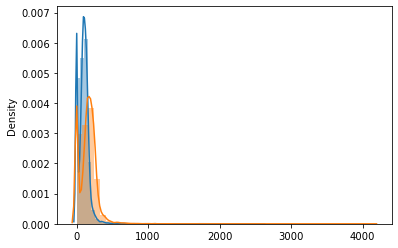

In [ ]:
sns.distplot(np.array(merge2.processed_abstract_count))
sns.distplot(np.array(merge2.abstract_word_count))

<AxesSubplot:xlabel='title_count', ylabel='Density'>

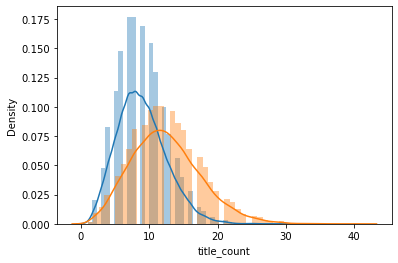

In [ ]:
sns.distplot(merge2.processed_title_count)
sns.distplot(merge2.title_count)

In [ ]:
merge2.describe()

,pubmed_id,Microsoft Academic Paper ID,abstract_word_count,body_word_count,title_count,processed_title_count,processed_abstract_count
count,9.811000e+03,6.600000e+01,12763.000000,12763.000000,12763.000000,12763.000000,12763.000000
mean,2.182848e+07,2.730813e+09,159.795503,4305.507169,12.454282,8.902217,97.253702
std,6.470990e+06,4.300500e+08,133.816973,3017.939233,5.078479,3.572738,81.965588
min,6.543900e+04,1.501710e+09,0.000000,40.000000,1.000000,1.000000,0.000000
25%,1.755789e+07,2.414852e+09,86.000000,2551.000000,9.000000,6.000000,51.000000
50%,2.215304e+07,3.002611e+09,162.000000,3686.000000,12.000000,9.000000,98.000000
75%,2.684952e+07,3.005680e+09,224.000000,5281.000000,16.000000,11.000000,136.000000
max,3.224832e+07,3.006649e+09,4132.000000,66664.000000,41.000000,33.000000,2593.000000


In [ ]:
def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).toarray()[0]
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [ ]:
three_gram = count_ngrams(merge2,'processed_title',3,3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import plotly.express as px 

In [ ]:
pip install plotly

<Figure size 2880x504 with 0 Axes>

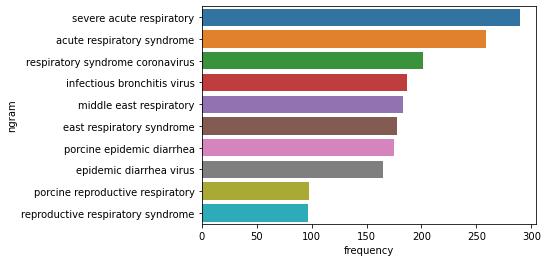

<Figure size 2880x504 with 0 Axes>

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=three_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
uni_gram = count_ngrams(merge2,'processed_title',1,1)

<Figure size 2880x504 with 0 Axes>

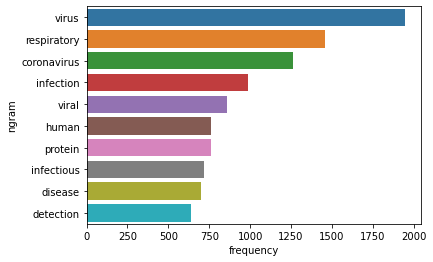

<Figure size 2880x504 with 0 Axes>

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
bii_gram = count_ngrams(merge2,'processed_title',2,2)

<Figure size 2880x504 with 0 Axes>

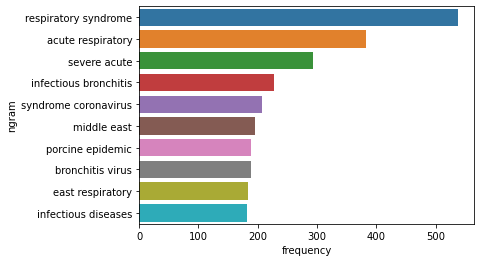

<Figure size 2880x504 with 0 Axes>

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
uni_gram = count_ngrams(merge2,'processed_text',1,1)

<Figure size 2880x504 with 0 Axes>

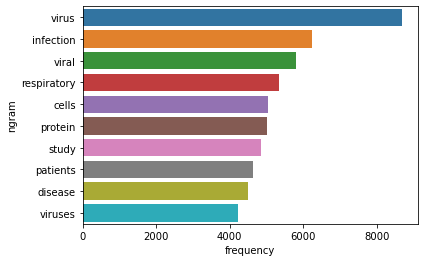

<Figure size 2880x504 with 0 Axes>

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
bii_gram = count_ngrams(merge2,'processed_text',2,2)

<Figure size 2880x504 with 0 Axes>

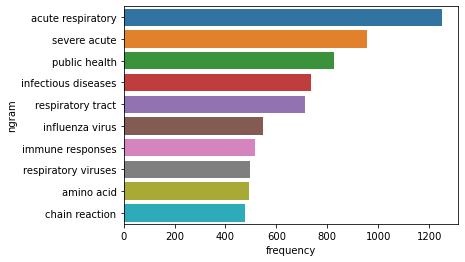

<Figure size 2880x504 with 0 Axes>

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[1:11],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
merge2.rename(columns={'abstract_x':'abstract'},inplace=True)

# 3. supervised entity recognition
supervised entity recognition is running on a customized biomedical dict using kindred package. We save raw output as entity text file, and then format the results to JSON format and render results in HTML format (.json and .html )

In [ ]:
def loadcorpus(title, abstract):
    covid_paper_data=[]
    if title != '':
        covid_paper_data.append(title)
    if abstract != '':
        #clean the “abstract” which not belongs to the abstract mainbody text
        if abstract.lower().startswith('abstract '):
            abstract = abstract[9:]
        elif abstract.lower().startswith('abstract'):
            abstract = abstract[8:]
        if abstract.lower().startswith('summary '):
            abstract = abstract[8:]
        elif abstract.lower().startswith('summary'):
            abstract = abstract[7:]
        elif abstract.lower().startswith('summary: '):
            abstract = abstract[9:]
        line = abstract.split('. ')
        if line != '':
            covid_paper_data.extend(line)
    return covid_paper_data

In [ ]:
'''
extract COVID-19 related papers
key words: COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV
We will processe all covid19 related paper and output recognition results in working directory.
'''
meta_df_title_abstract = merge2[['cord_uid','doi','sha','title','abstract','publish_time']].fillna('') #process na
s_covid_title = meta_df_title_abstract.title.str.contains('COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV') #1780
s_covid_abstract = meta_df_title_abstract.abstract.str.contains('COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV') #1611
covid_bool = s_covid_title | s_covid_abstract  # the papers' title or abstract related to COVID-19 
covid_papers = meta_df_title_abstract[covid_bool]
del covid_bool,meta_df_title_abstract
print(covid_papers.shape) #among all papers, the number of COVID-19 related papers: 3455
covid_papers.head()

(92, 6)


,cord_uid,doi,sha,title,abstract,publish_time
16,hth8f5sn,10.1101/2020.02.22.20025460,04030bba3035a58c7725ae267973206f6eb6c0b4,Development and Evaluation of A CRISPRbased Di...,Abstract The recent outbreak of infections by ...,2020-02-23
37,g5wpa2ee,10.1101/2020.02.05.936013,0aff00101d5ccc6592987185ab833f95d842f98b,Potentially highly potent drugs for 2019nCoV,Abstract The World Health Organization WHO has...,2020-02-13
39,0ga5rel6,10.1101/2020.02.29.20027698,0b460e73926eb107001c95c0dfeae2362b4251b0,Precautions are Needed for COVID19 Patients wi...,Abstract With the ongoing outbreak of Coronavi...,2020-03-03
48,cr0s5d1j,10.1101/2020.02.25.20027763,0eee9760aee0ca2fdf8d1d215c3689d5f8d84df5,Prevalence and clinical features of 2019 novel...,Abstract Background With the spread of COVID19...,2020-02-27
63,jg6v644y,10.1101/2020.03.05.20031591,114ed64f52f503d9d2e2ba1fd1ee62b0a168cd84,Acute Myocardial Injury of Patients with Coron...,Abstract China respiratory manifestations of t...,2020-03-08


In [ ]:
%%capture
# all results display are too long
# For result display preview, random sample 10% of covid19 related papers.
covid_papers_sample=covid_papers.sample(frac=0.1, replace=False, random_state=1) 
print(covid_papers_sample.shape)
covid_papers_sample.head()

In [ ]:
annotations_tmp_dir = './corpus-paper-anno'

In [ ]:
# Customized dict directory declaration
dict_list_dir = 'C:/Users/D. RHUTHVIK/Desktop/ML/proj data/dict'
dict_list = (',').join(os.listdir(dict_list_dir))
print(dict_list)

aa_mutation.txt,diagnosis.txt,disease.txt,drug.txt,gene.txt,host_human.txt,host_other.txt,location.txt,nucleotide_mutation.txt,organ.txt,organization.txt,pathogen.txt,pathologic.txt,prevention.txt,protein.txt,risk_factors.txt,strain.txt,structure.txt,symptoms.txt,transmission.txt,treatment.txt


In [ ]:
'''
We use kindred package to implement entitiy recognize based on customized wordlists.
Define a class "NewAnnotate" to init dict libraries, parse paper corpus and implement entity recognition
Add new annotation types("DATE", "GPE", "CARDINAL", "PERCENT") from spacy model entity prediction
'''
import os
import kindred
import spacy
nlp_core = spacy.load("en_core_web_sm")
nlp_need_tags = set(['DATE','GPE','CARDINAL','PERCENT'])
import bisect

class NewAnnotate(object):
    def __init__(self, ner_out_dir, corpus_text, corpus_name, dictlists, dictlist_dir):
        self.ner_out_dir = ner_out_dir
        self.corpus_text = corpus_text
        self.corpus_name = corpus_name
        self.entityRecognizer = None
        self.init_dict_recognizer(dictlists, dictlist_dir)
    
    #Init dict libraries for NER
    def init_dict_recognizer(self, dictlists, dictlist_dir):
        wordlistDict = {}
        for wordlist in dictlists.split(','):
            wordlistpath = os.path.join(dictlist_dir, wordlist)
            assert os.path.isfile(wordlistpath), 'Unable to access file: %s' % wordlistpath
            entityType = os.path.splitext(os.path.basename(wordlistpath))[0]
            wordlistDict[entityType] = wordlistpath
        wordlistLookup = kindred.EntityRecognizer.loadWordlists(wordlistDict, idColumn=0, termsColumn=0)
        self.entityRecognizer = kindred.EntityRecognizer(wordlistLookup)
    
    def addparseWordsUsingSpacyTags(self, _ss, _oldents):
        newents = _oldents
        for nlp_doc in nlp_core.pipe([_ss], disable=["tagger", "parser"]):
            for _ent in nlp_doc.ents:
                if _ent.label_ in nlp_need_tags:
                    already_annotated = False
                    for _oldent in _oldents:
                        if (_oldent[0] >= _ent.start_char and _oldent[0] <= _ent.end_char) or (_oldent[1] >= _ent.start_char and _oldent[1] <= _ent.end_char) or (_ent.start_char >= _oldent[0] and _ent.start_char <= _oldent[1]) or (_ent.end_char >= _oldent[0] and _ent.end_char <= _oldent[1]):
                            already_annotated = True
                            break
                    if not already_annotated:
                        bisect.insort(newents, (_ent.start_char, _ent.end_char, _ent.label_, _ss[_ent.start_char: _ent.end_char]))
                        
        return newents
    
    #implement entity recognize
    def entity_recognize(self):
        parser = kindred.Parser()
        print('begin entity annotate {}'.format(self.corpus_name))
        sentenceCorpus = []
        for ss_corpus_text in self.corpus_text.split(". "):
            ss_corpus = kindred.Corpus(ss_corpus_text)
            parser.parse(ss_corpus)
            self.entityRecognizer.annotate(ss_corpus)
            sentenceCorpus.append(ss_corpus)

        if not os.path.exists(self.ner_out_dir):
            os.makedirs(self.ner_out_dir)
        entity_annotate_output_file = os.path.join(self.ner_out_dir, '{}.entity'.format(self.corpus_name))
        file_out = open(entity_annotate_output_file, 'w', encoding='utf-8')
        for ss_corpus in sentenceCorpus:
            for _doc in ss_corpus.documents:
                file_out.writelines('{}\n'.format(_doc.text.strip().strip('.')))
                _ents = []
                for _entity in _doc.entities:
                    for _pos in _entity.position:
                        #file_out.writelines('{}\t{} {} {}\t{}\n'.format(_entity.sourceEntityID, _entity.entityType, _pos[0], _pos[1], _entity.text))
                        _ents.append((_pos[0], _pos[1], _entity.entityType, _entity.text))
                newents = self.addparseWordsUsingSpacyTags(_doc.text.strip().strip('.'), _ents)
                ei = 1
                for _newent in newents:
                    file_out.writelines('T{}\t{} {} {}\t{}\n'.format(ei, _newent[2], _newent[0], _newent[1], _newent[3]))
                    ei = ei + 1
                file_out.writelines('\n')
        file_out.close()
        print('end entity annotate {} file is {}'.format(self.corpus_name, entity_annotate_output_file))
        return entity_annotate_output_file

In [ ]:
'''
    Define a class "AnnoFormat" to save the results in JSON format and render results in HTML format (.json and .html )
    Add save and display of new annotation types("DATE", "GPE", "CARDINAL", "PERCENT")
'''
import json
import os
import re
import spacy

# define the colors and options in HTML render
colors = {"DIAGNOSIS": "#ef5050", "ORGANIZATION": "#F0E68C", "DISEASE": "#FF8888", "LOCATION": "#FFDAB9",
          "PATHOLOGIC": "#FF00D4","SYMPTOMS": "#D2691E", "TREATMENT": "#f172b2", "PATHOGEN": "#7FFFD4",
          "GENE": "#33FFFF","HOST_OTHER": "#00DD77", "HOST_HUMAN": "#1FBC9C", "PROTEIN": "#00BFFF", "STRUCTURE": "#87CEFA",
          "ORGAN":"#FFFF77", "AA_MUTATION":"#801dae", "NUCLEOTIDE_MUTATION":"#cca4e3", "RISK_FACTORS":"#f9906f", "TRANSMISSION":"#b36d61", "DRUG":"#4b5cc4", "STRAIN":"#426666", 
          "DATE":"#FF7766","GPE":"#FFDD55","CARDINAL":"#FF8800","PERCENT":"#FF5511"
          }
options = {"ents": ["DIAGNOSIS", "ORGANIZATION", "DISEASE", "LOCATION", "PATHOLOGIC", "SYMPTOMS", "TREATMENT",
                    "PATHOGEN", "GENE","HOST_HUMAN", "HOST_OTHER", "PROTEIN", "STRUCTURE",
                    "AA_MUTATION", "NUCLEOTIDE_MUTATION", "RISK_FACTORS", "TRANSMISSION", "DRUG", "STRAIN", "ORGAN",
                    "DATE", "GPE", "CARDINAL", "PERCENT"
                    ], "colors": colors}

class AnnoFormat(object):
    def __init__(self, corpus, corpus_format_dir, anno_file, publish_time):
        self.anno_file=anno_file
        self.corpus = corpus
        self.format_outdir = corpus_format_dir
        self.texts = ""
        self.entitys = []
        self.jsonformat = {}
        self.entsjsonformat = {}
        self.ents = []
        self.publish_time = publish_time
        
    def erJsonFormat(self):
        self.jsonformat["text"]=self.texts
        self.jsonformat["title"]=self.corpus
        self.jsonformat["publish_time"]=self.publish_time
        for _entity in self.entitys:
            _entitylineitems=_entity.split("\t")
            _entity_info = _entitylineitems[1].split(" ")
            _current_entity = {}
            if _entity_info[0]=="Title" or _entity_info[0]=="Paragrah":
                continue
            else:
                _current_entity["index"] = _entitylineitems[0]
                _current_entity["start"] = int(_entity_info[1])
                _current_entity["end"] = int(_entity_info[2])
                _current_entity["label"] = _entity_info[0].upper()
                self.ents.append(_current_entity)
        self.jsonformat["ents"]=self.ents
        with open(os.path.join(self.format_outdir, self.corpus + "_ents.json"), 'w', encoding='utf-8') as jsonFile:
            json.dump(self.jsonformat,jsonFile)

    def erHtmlFormat(self):
        renderex=[]
        renderex.append(self.jsonformat)
        html = spacy.displacy.render([self.jsonformat], style="ent", manual=True, options=options, jupyter = False)
        with open(os.path.join(self.format_outdir, self.corpus + "_ents.html"), 'w', encoding='utf-8') as htmlFile:
            html_custom=html.replace('<span style="', '<span style="color:#666666;')
            htmlFile.write(html_custom)

    def erParseFormat(self):
        with open(self.anno_file, encoding='utf-8')as f:
            content = f.readlines()
            p = re.compile('^(T\d+\t)*')  # match example: "T1	pathogen 38 51	Coronaviruses"
            global_offset = 0
            current_offset = 0
            entity_index = 0
            for _line in content:
                _line=_line.strip()
                if len(p.findall(_line)[0]) > 0: # is an entity line
                    entity_index = entity_index + 1
                    entityline_split = _line.split('\t')
                    Tnature_coordinate = entityline_split[1].split(' ')
                    start = Tnature_coordinate[1]
                    end = Tnature_coordinate[2]
                    # adjust the coordinate and position offset
                    entity = 'T' + str(entity_index) + '\t' + str(Tnature_coordinate[0]) + ' ' + str(
                        int(start) + global_offset) + ' ' + str(int(end) + global_offset) + '\t' + entityline_split[2]
                    self.entitys.append(entity)
                else:  # is an char line
                    if len(_line) > 0:  #is not empty char
                        global_offset = global_offset + current_offset
                        current_offset = 0
                        self.texts = self.texts + _line+'. '
                        current_offset = current_offset + len(_line) + 2

In [ ]:
# annotate an example paper corpus (take an paper which cord_uid is "9lissxsy" as an example)
# make an "9lissxsy_anno" directory in the output dir("corpus-paper-anno")
# save as "9lissxsy.entity", "9lissxsy_ents.json", "9lissxsy_ents.html" under the "9lissxsy_anno" directory

#example paper '9lissxsy'
_corpus ="wb19vqv3" # cord_uid
_corpus_row = covid_papers.loc[covid_papers['cord_uid'] == _corpus]

#init annotate
_corpus_annotations_dir = os.path.join(annotations_tmp_dir, _corpus + "_anno")
_corpus_text = ('. ').join(loadcorpus(_corpus_row['title'].values[0], _corpus_row['abstract'].values[0]))
annotate = NewAnnotate(_corpus_annotations_dir, _corpus_text, _corpus, dict_list, dict_list_dir)

#entity recognization
annofile=annotate.entity_recognize()

# entity format
annoformat=AnnoFormat(_corpus, _corpus_annotations_dir, annofile, _corpus_row['publish_time'].values[0])
annoformat.erParseFormat()
annoformat.erJsonFormat()
annoformat.erHtmlFormat() # entity html render
del annotate, annoformat

In [ ]:
'''
The raw entity recognitioin output in text file, show an example as follows:
9lissxsy_anno/9lissxsy.entity"
'''
import os
example_file_path = os.path.join(annotations_tmp_dir, "wb19vqv3"+"_anno")
with open(os.path.join(example_file_path,"wb19vqv3.entity"), encoding = 'utf-8') as entity_example_file:
    print(entity_example_file.read())

In [ ]:
#%%capture
'''
The JSON Format results, show an example as follows:
9lissxsy_anno/9lissxsy_ents.json"
'''
with open(os.path.join(example_file_path,"wb19vqv3_ents.json"), encoding = 'utf-8') as json_example_file:
    json_ents = json.loads(json_example_file.read())
    print(json.dumps(json_ents, indent=2))

In [ ]:
'''
The rendered HTML Format results, show an example as follows:
9lissxsy_anno/9lissxsy_ents.html"
'''
from IPython.core.display import display, HTML
with open(os.path.join(example_file_path,"wb19vqv3_ents.html"), encoding = 'utf-8') as html_example_file:
    display(HTML(html_example_file.read()))

In [ ]:
%%capture
# Then annotate all covid19 related paper corpus and save each recognition result as *.entity, *_ents.json, *_ents.html
for row in covid_papers.itertuples():
    _corpus = row.cord_uid
    #init annotate
    _corpus_annotations_dir = os.path.join(annotations_tmp_dir, _corpus + "_anno")
    _corpus_text = ('. ').join(loadcorpus(row.title, row.abstract))
    _corpus_publish_time = row.publish_time
    annotate = NewAnnotate(_corpus_annotations_dir, _corpus_text, _corpus, dict_list, dict_list_dir)

    #entity recognization
    annofile=annotate.entity_recognize()

    # entity format
    annoformat=AnnoFormat(_corpus, _corpus_annotations_dir, annofile, _corpus_publish_time)
    annoformat.erParseFormat()
    annoformat.erJsonFormat()
    annoformat.erHtmlFormat() # entity html render

In [ ]:
#Output dir for merged results
annotations_dir = './corpus-paper-annoformat'
if not os.path.exists(annotations_dir):
    os.makedirs(annotations_dir)

In [ ]:
#define a function mergejsonents to merge all NER output results in json format for each paper
def mergejsonents(annotations_tmp_dir, jsonents_dir):
    f = open(os.path.join(jsonents_dir,"papers_anno.json"),'w',encoding='utf-8')
    f_sample = open(os.path.join(jsonents_dir,"papers_anno_sample.json"),'w',encoding='utf-8')
    for parent, dirnames, filenames in os.walk(annotations_tmp_dir):
        for filename in filenames:
            if filename.endswith('_ents.json'):
                file_path = os.path.join(parent, filename)
                sf = open(file_path,encoding='utf-8')
                ents_content = sf.read()
                sf.close()
                f.write(ents_content+"\n")
                cord_uid = filename.split('_ents.json')[0]
                if cord_uid in covid_papers_sample['cord_uid'].values:
                    f_sample.write(ents_content+"\n")
    f.close()
    f_sample.close()

# merge json results
mergejsonents(annotations_tmp_dir, annotations_dir)

# 3. supervised entity recognition
supervised entity recognition is running on a customized biomedical dict using kindred package. We save raw output as entity text file, and then format the results to JSON format and render results in HTML format (.json and .html )

# 4. Merge results and Display
merge all COVID-19 papers' NER results in JSON and HTML format(num:3455) and extract 10% sample papers' NER results (num:346) for display (JSON and HTML). 

In [ ]:
#%%capture
# For the sample papers, print NER results in pretty JSON style
json_sample_file = open(os.path.join(annotations_dir,"papers_anno_sample.json"), encoding = 'utf-8')
for json_line in json_sample_file.readlines():
    json_ents = json.loads(json_line)
    #print(json.dumps(json_ents, indent=2))
    print(json.dumps(json_ents))
json_sample_file.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#define a function mergehtmls to merge all NER output results in html format for each paper
def mergehtmls(annotations_tmp_dir, htmlrender_dir):
    f= open(os.path.join(htmlrender_dir,"papers_anno.html"),'w',encoding='utf-8')
    f_sample = open(os.path.join(htmlrender_dir,"papers_anno_sample.html"),'w',encoding='utf-8')
    f.write('<?xml version="1.0" encoding="utf-8"?>')
    f_sample.write('<?xml version="1.0" encoding="utf-8"?>')
    for parent, dirnames, filenames in os.walk(annotations_tmp_dir):
        for filename in filenames:
            if filename.endswith('_ents.html'):
                file_path = os.path.join(parent, filename)
                sf = open(file_path,encoding='utf-8')
                ents_html = sf.read()
                f.write(ents_html)
                f.write("<br /><br /><br />")
                cord_uid = filename.split('_ents.html')[0]
                if cord_uid in covid_papers_sample['cord_uid'].values:
                    f_sample.write(ents_html+"\n")
mergehtmls(annotations_tmp_dir, annotations_dir)

In [ ]:
#%%capture
#For the sample papers, preview the NER results by IPython HTML Display 
from IPython.core.display import display, HTML
with open(os.path.join(annotations_dir,"papers_anno_sample.html"), encoding = 'utf-8') as html_sample_file:
    display(HTML(html_sample_file.read()))

# 5. **(For Tasks) **Simple statistics and barplot of terms occurrences count based on NER results, output TOP occurrence terms from each dict type.

In [ ]:
#Init dict libraries for synonyms words combination
synonyms_dict = {}
representation_dict = {}
def synonyms_words_dict(dictlists, dictlist_dir):
    wordlistDict = {}
    for wordlist in dictlists.split(','):
        wordlistpath = os.path.join(dictlist_dir, wordlist)
        assert os.path.isfile(wordlistpath), 'Unable to access file: %s' % wordlistpath
        entityType = os.path.splitext(os.path.basename(wordlistpath))[0]
        wordlistDict[entityType] = wordlistpath

        with open(wordlistpath, 'r', encoding='utf-8') as dict_file:
            for _line in dict_file:
                _line = _line.strip('\n')
                _words = _line.split('|')
                representation_dict[_words[0].lower()] = _words[0]
                for i in range(0, len(_words)):
                    synonyms_dict[_words[i].lower()] = _words[0].lower()


    #print(synonyms_dict)

#Terms Occurrence Count with synonyms combined
def statistics_group_by_synonyms_words(dict_list_dir):
    dictLists = ''
    entityTypes = []
    data_stat_dict = {}

    for root, subdirs, dict_files in os.walk(dict_list_dir):
        dictLists = ','.join(dict_files)
        #print(dict_files)
        for dict_file in dict_files:
            entityTypes.append(os.path.splitext(dict_file)[0].upper())

    synonyms_words_dict(dictLists, dict_list_dir)

    # statistics for terms occur
    statistics = {}
    f = open(os.path.join(annotations_dir, "papers_anno.json"), encoding='utf-8')

    for json_str in f.readlines():
        if json_str != '':
            myjson = json.loads(json_str)
            text = myjson["text"]
            cord_uid = myjson["title"]
            ents = myjson["ents"]
            for ent in ents:
                start_char = ent['start']
                end_char = ent['end']
                label_type = ent['label']
                label_text = text[start_char:end_char]
                if label_type in entityTypes:
                    if label_type not in statistics:
                        statistics[label_type] = {}
                    if label_text in synonyms_dict.keys():
                        _entity_name = synonyms_dict[label_text.lower()] 
                    else:
                        _entity_name='covid-19'
                    
                    if _entity_name not in statistics[label_type]:
                        statistics[label_type][_entity_name] = 0
                    statistics[label_type][_entity_name] += 1
    f.close()

    # sort by entity occurrence in each entity type
    for label_type in statistics.keys():
        a = statistics[label_type]
        print("======{}: length is {}======".format(label_type, len(a)))
        a1 = sorted(a.items(), key=lambda x: x[1], reverse=True)
        _dict = {}

        for i in range(len(a1)):
            _list = []
            _list.append(representation_dict[a1[i][0]])
            _list.append(a1[i][1])
            _dict[_list[0]] = _list[1]

            print(tuple(_list))
            if i >= 9:  # print Top10 terms
                break

        data_stat_dict[label_type] = _dict

    return data_stat_dict
statistics_combinesyns=statistics_group_by_synonyms_words(dict_list_dir)

betacov/korea/kcdc03/2020


KeyError: '-'

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
def plot_dict(topic, threshold, sort_values=False, barh=False, width=20, height=4, title=''):
    filtered = dict(topic)
    to_delete = []
    for key in filtered:
        if filtered[key] < threshold:
            to_delete.append(key)
    for key in to_delete:
        del filtered[key]

    if sort_values == False:
        lists = sorted(filtered.items())
    else:
        if sort_values == True:
            lists = sorted(filtered.items(), key=lambda item: item[1])
        else:
            lists = sorted(filtered.items(), key=sort_values)

    x, y = zip(*lists)

    fig = figure(num=None, figsize=(width, height))

    if title != '':
        fig.suptitle(title, fontsize=20)

    if barh == True:
        plt.barh(x, y)
    else:
        plt.bar(x, y)
    plt.show()
    # plt.savefig('{}.png'.format(title))


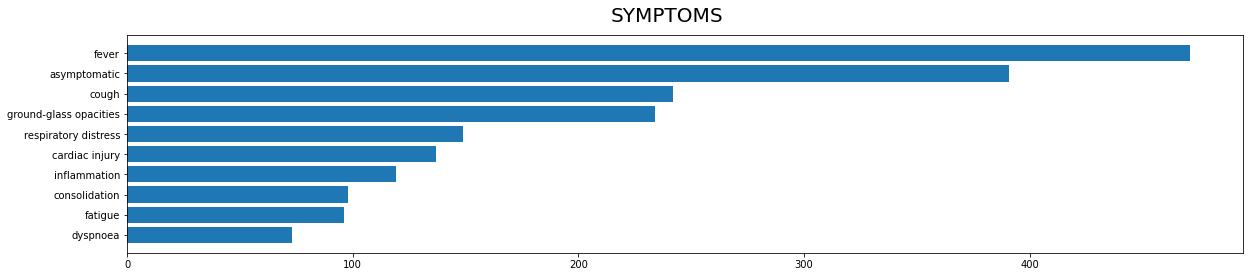

In [ ]:
_topic = 'SYMPTOMS'
plot_dict(statistics_combinesyns[_topic], threshold=50 ,sort_values=True,barh=True, width=20, title=_topic)

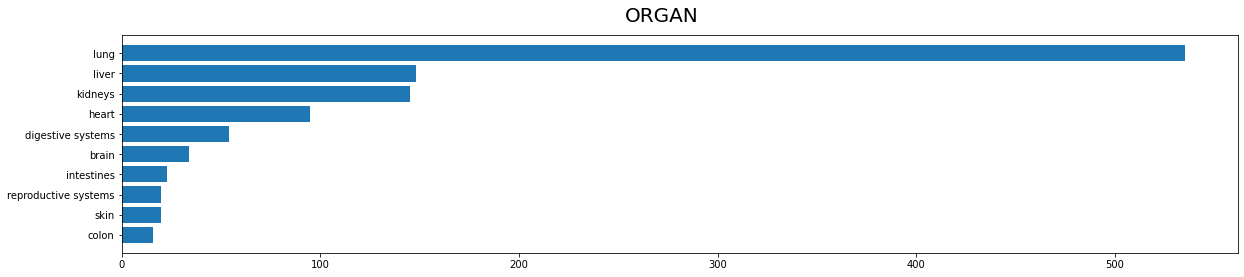

In [ ]:
_topic = 'ORGAN'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True,barh=True, width=20, title=_topic)

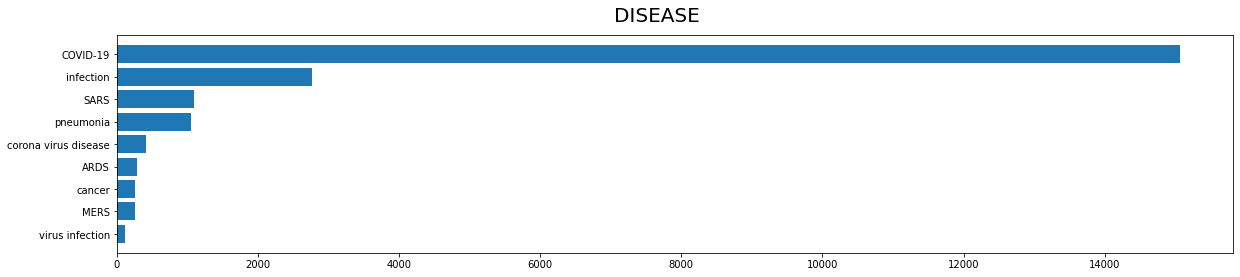

In [ ]:
_topic = 'DISEASE'
plot_dict(statistics_combinesyns[_topic], threshold=50 ,sort_values=True,barh=True, width=20, title=_topic)

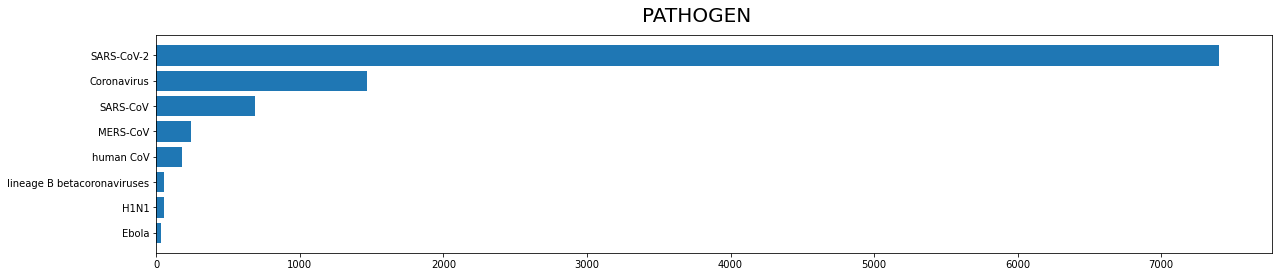

In [ ]:
_topic = 'PATHOGEN'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

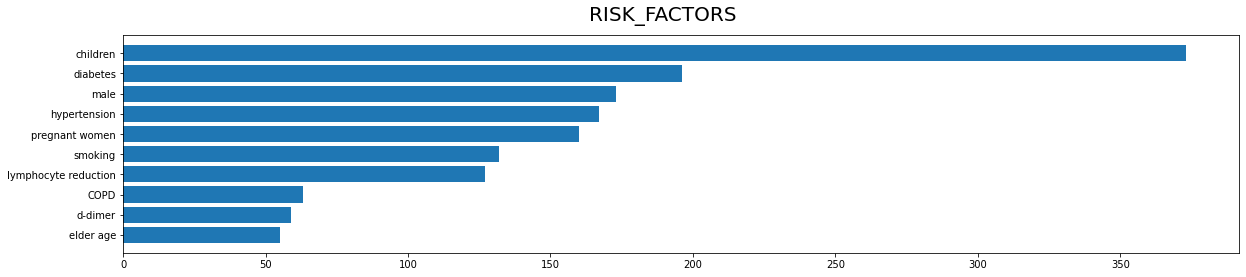

In [ ]:
_topic = 'RISK_FACTORS'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

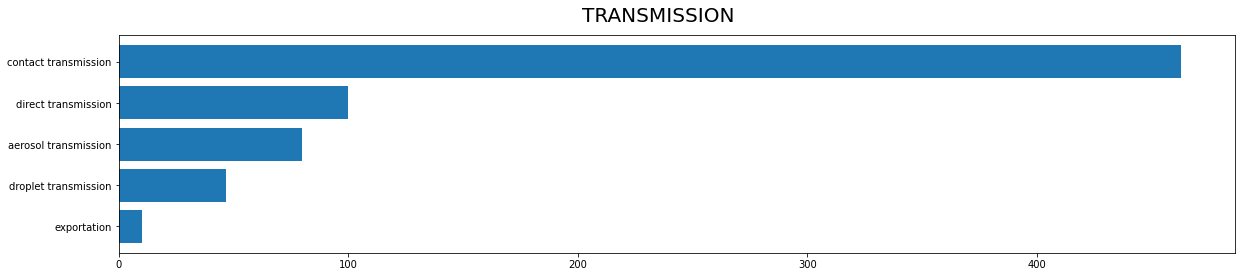

In [ ]:
_topic = 'TRANSMISSION'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

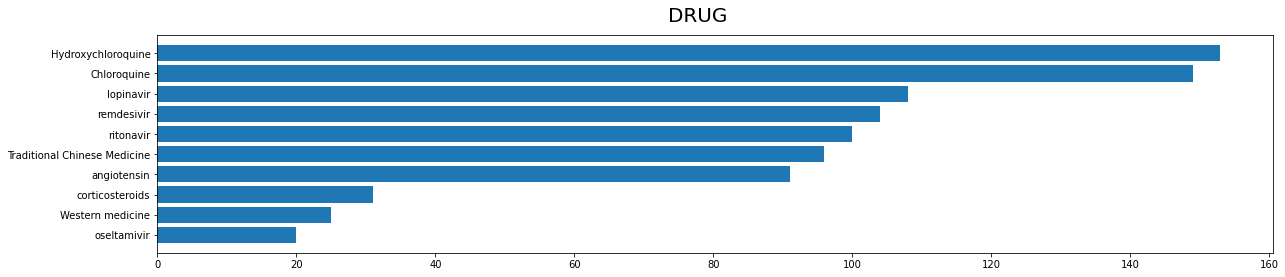

In [ ]:
c

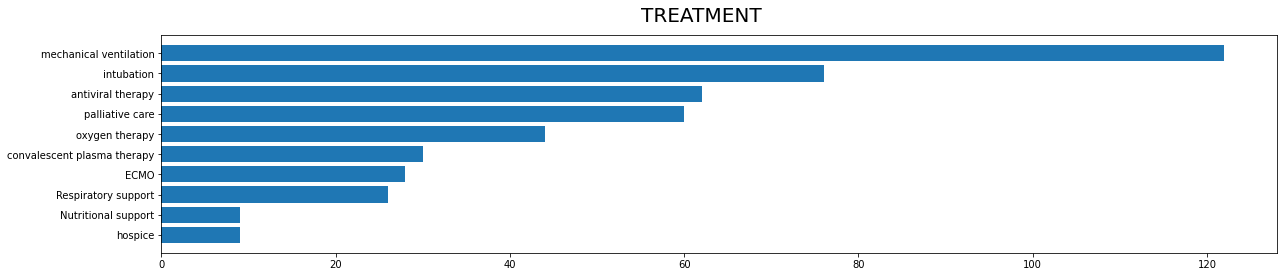

In [ ]:
_topic = 'TREATMENT'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True,barh=True, width=20, title=_topic)

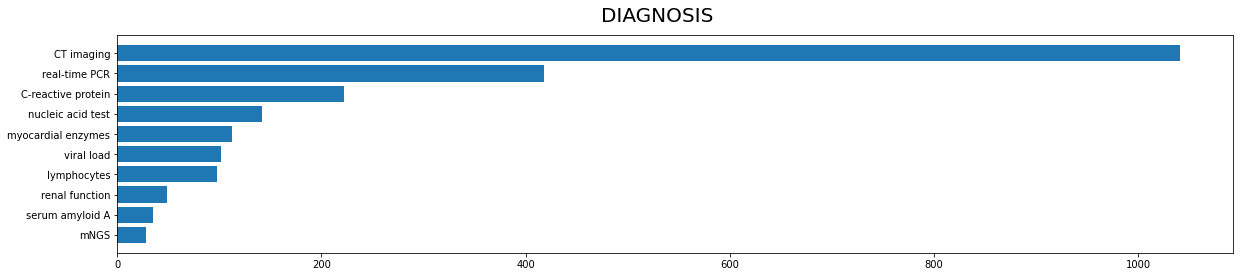

In [ ]:
_topic = 'DIAGNOSIS'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

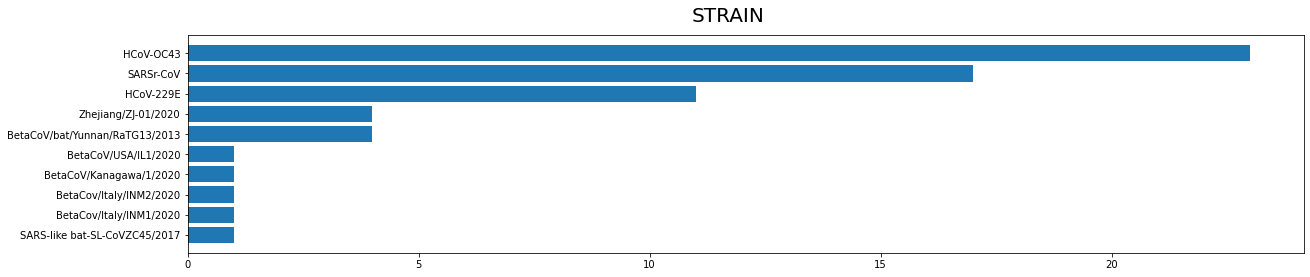

In [ ]:
_topic = 'STRAIN'
plot_dict(statistics_combinesyns[_topic], threshold=1 ,sort_values=True,barh=True, width=20, title=_topic)

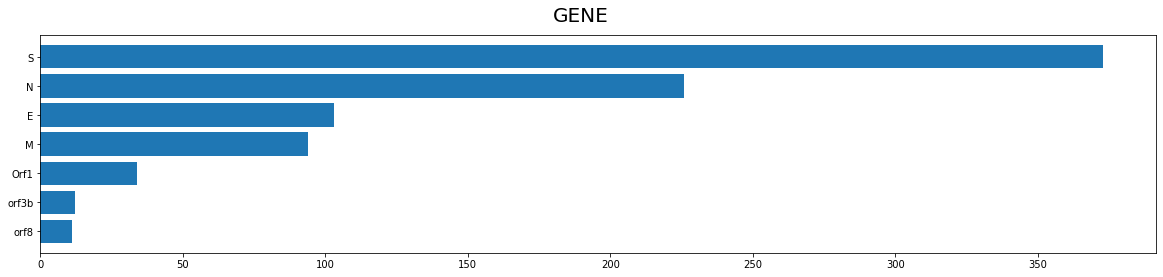

In [ ]:
_topic = 'GENE'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

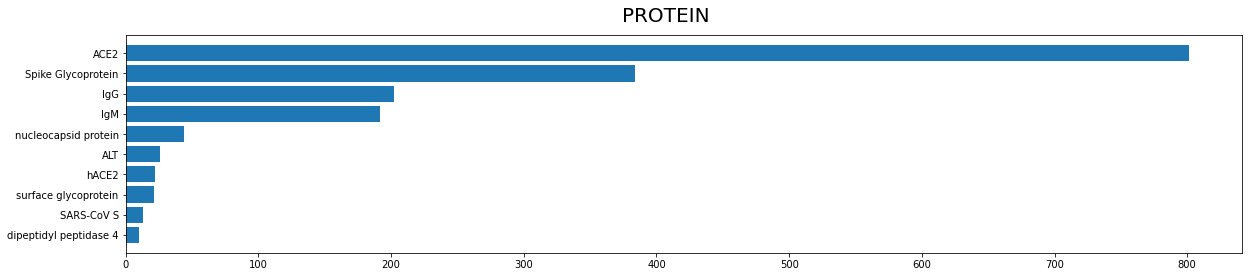

In [ ]:
_topic = 'PROTEIN'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

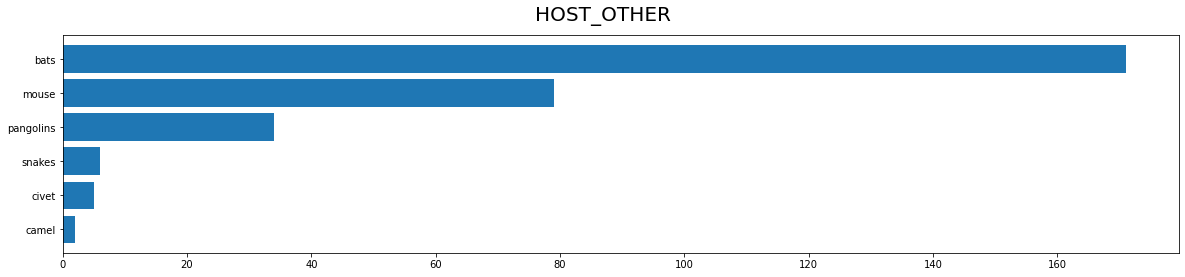

In [ ]:
_topic = 'HOST_OTHER'
plot_dict(statistics_combinesyns[_topic], threshold=2 ,sort_values=True,barh=True, width=20, title=_topic)

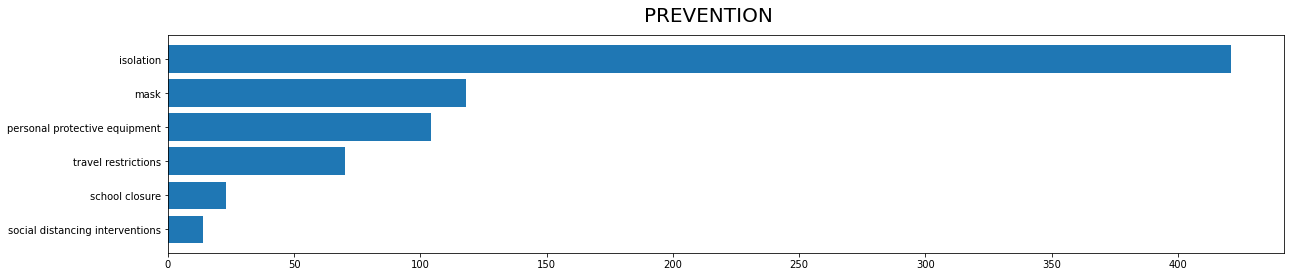

In [ ]:
_topic = 'PREVENTION'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True, barh=True, width=20, title=_topic)

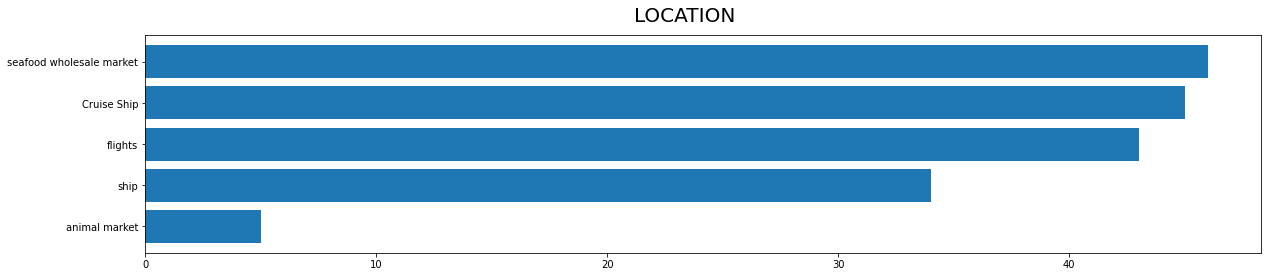

In [ ]:
_topic = 'LOCATION'
plot_dict(statistics_combinesyns[_topic], threshold=2 ,sort_values=True, barh=True, width=20, title=_topic)

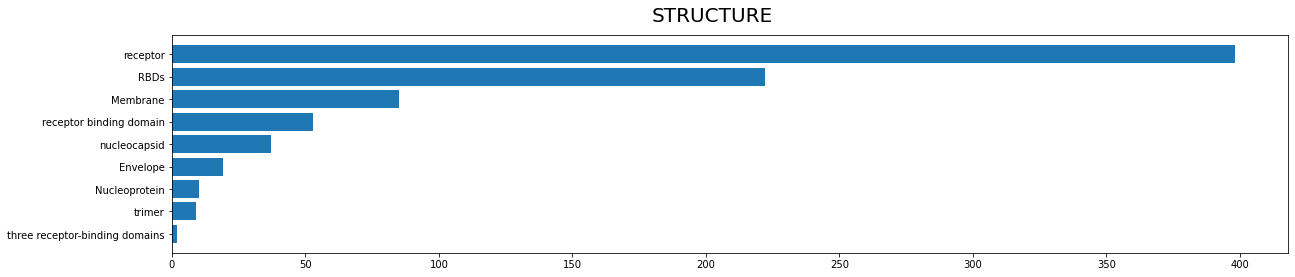

In [ ]:
_topic = 'STRUCTURE'
plot_dict(statistics_combinesyns[_topic], threshold=2 ,sort_values=True, barh=True, width=20, title=_topic)

# 6. **(For Tasks) **Find related papers by query biomedical topic and keyword. Render top paper results in HTML table, highlight the result terms, sorted by count of the irredudant terms. 

Simple entity occurrence statistics may have biased results.  Because in fact some terms' annotation may not related to the topic in context of paper. We need to filter papers' texts by keywords (keywords can be empty, that is, no filteration) at first. Then find dict terms annotations in each paper related to given dict type (which called topic).

In [ ]:
#define function filterbykeywords used to filter NER results.
#We only retain entity recognition results of COVID-19 papers whose texts contain 'keyword'
#return the filtered NER results in JSON format
def filterbykeywords(annojsonFile, keywords):
    f = open(annojsonFile, encoding='utf-8')
    filterjson = []
    for json_str in f.readlines():
        if json_str is not '':
            if len(keywords)==0:
                filterjson.append(json_str)
            else:
                myjson = json.loads(json_str)
                text = myjson["text"]
                if any(_word in text for _word in keywords):
                    filterjson.append(json_str)

    f.close()
    return filterjson


Output paper rank result are rendered in HTML table, which is sorted by "terms occurrences"(descending) and "publish_date"(descending). In the table, the related annotations highlighted in 'red' font, the search keywords highlighted in 'blue bold' font.

In [ ]:
#Parse filtered NER json format, render HTML table dataframe
#sort by columns of "irredundant terms occurrence"(first descending) and "publish_time"(second descending)
#columns are ['cord_uid', 'related terms', 'irredundant terms occurrence', 'title+abstract', 'publish_time']
def correlated_articles(filterjson, topic):
    correlatedResultDict = {}
    
    for json_str in filterjson:
        if json_str is not '':
            myjson = json.loads(json_str)
            ents = myjson["ents"]
            cord_uid = myjson['title']
            correlatedResultDict[cord_uid] = {}
            correlatedResultDict[cord_uid]["text"] = myjson["text"]
            correlatedResultDict[cord_uid]["publish_time"] = myjson["publish_time"]
            correlatedResultDict[cord_uid]["terms"] = set()
            correlatedResultDict[cord_uid]["termsnum"] = 0
            correlatedResultDict[cord_uid]["posList"] = []
            for ent in ents:
                label_type = ent['label']
                start_char = ent['start']
                end_char = ent['end']
                label_text = correlatedResultDict[cord_uid]["text"][start_char:end_char]
                if topic.lower() == label_type.lower():
                    correlatedResultDict[cord_uid]["terms"].add(representation_dict[synonyms_dict[label_text.lower()]])
                    correlatedResultDict[cord_uid]["termsnum"]=len(correlatedResultDict[cord_uid]["terms"])
                    correlatedResultDict[cord_uid]["posList"].append((start_char, end_char))

    return correlatedResultDict

def getAnnotationHtml(text, posList, keywords):
    _prePos = 0
    annotationHtmlStr = ''
    for _pos in posList:
        annotationHtmlStr += text[_prePos:_pos[0]]
        annotationHtmlStr += " <font color='red'>" + text[_pos[0]:_pos[1]] + "</font> "
        _prePos = _pos[1]

    annotationHtmlStr += text[_prePos:]
    for _word in keywords:
        if _word is not '':
            annotationHtmlStr=annotationHtmlStr.replace(_word, " <font color='blue' style='font-weight:bold'>" + _word + "</font> ")
    return annotationHtmlStr

def get_answers(topic, keywords,top):
    filterjson = filterbykeywords(os.path.join(annotations_dir, "papers_anno.json"), keywords)
    print("All related papers number is: {}, we show top {} papers ordered by occurrences".format(len(filterjson), top))
    correlatedResultDict = correlated_articles(filterjson, topic)
    temp_sort_result = sorted(correlatedResultDict.items(), key=lambda x: x[1]["termsnum"], reverse=True)
    ranked_aswers = []
    pandasData = []
    for i in range(0,len(temp_sort_result)):
        if i>top:
            break
        rowData = []
        cord_uid = temp_sort_result[i][0]
        #print(cord_uid)
        annotationHtml = getAnnotationHtml(correlatedResultDict[cord_uid]["text"], correlatedResultDict[cord_uid]["posList"], keywords)
        rowData += [cord_uid, ', '.join(correlatedResultDict[cord_uid]["terms"]), correlatedResultDict[cord_uid]["termsnum"], annotationHtml,  correlatedResultDict[cord_uid]["publish_time"]]
        pandasData.append(rowData)
    '''
    for cord_uid in correlatedResultDict.keys():
        rowData = []
        annotationHtml = getAnnotationHtml(correlatedResultDict[cord_uid]["text"], correlatedResultDict[cord_uid]["posList"], keywords)
        rowData += [cord_uid, ', '.join(correlatedResultDict[cord_uid]["terms"]), correlatedResultDict[cord_uid]["termsnum"], annotationHtml,  correlatedResultDict[cord_uid]["publish_time"]]
        pandasData.append(rowData)
    '''
    #cord_uid, content, occurrence, related terms, publish_time
    question_HTML = '<div style="font-family: Times New Roman; font-size: 28px; padding-bottom:28px"><b>Topic</b>: ' + topic +'       <b>, Keywords</b>:'+(', ').join(keywords) + '</div>'
    display(HTML(question_HTML))
    df = pd.DataFrame(pandasData,
                      columns=['cord_uid', 'related terms', 'irredundant terms occurrence', 'title+abstract', 'publish_time'])
    df=df.sort_values(["irredundant terms occurrence", "publish_time"], ascending = (False, False))
    df = df.reset_index(drop=True)
    df_top10 = df.head(top)
    del df
    answers_HTML = df_top10.to_html(render_links=True, escape=False, justify ='left')#, formatters={'title+abstract': lambda x: '<b>' + x + '</b>'})
    answers_HTML = answers_HTML.replace('<td>','<td style="text-align: center;">')
    #print(answers_HTML)
    display(HTML(answers_HTML))

### Finding related papers and display of ranked paper result provides more confidence and intelligible results for CORD-19 challenge tasks.


For example, a lot of papers may contain biomedical terms in the topic dict of "Risk_Factors", but risk factor is not the topic of paper, and the terms mentioned in the paper context are for other purpose. 

We first query papers by keywords ('risk factor') and then count the occurrences of biomedical terms of the topic ('RISK_FACTORS') from dict. Render top papers' result in HTML table, highlight the topic terms and query keyword, sorted by irredudant terms' count. 


* Task1: What is known about transmission, incubation, and environmental stability?

In [ ]:
get_answers(topic='TRANSMISSION', keywords=['transmission','incubation','environmental stability'], top=5)

All related papers number is: 883, we show top 5 papers ordered by occurrences


,cord_uid,related terms,irredundant terms occurrence,title+abstract,publish_time
0,bbghqy1a,"contact transmission, aerosol transmission, direct transmission",3,"Evidence for probable aerosol transmission of SARS-CoV-2 in a poorly ventilated restaurant. Background: The role of aerosols in the transmission of SARS-CoV-2 remains debated. We analysed an outbreak involving three non-associated families in Restaurant X in Guangzhou, China, and assessed the possibility of aerosol transmission of SARS-CoV-2 and characterize the associated environmental conditions. Methods: We collected epidemiological data, obtained a video record and a patron seating-arrangement from the restaurant, and measured the dispersion of a warm tracer gas as a surrogate for exhaled droplets from the suspected index patient. Computer simulations were performed to simulate the spread of fine exhaled droplets. We compared the in-room location of subsequently infected cases and spread of the simulated virus-laden aerosol tracer. The ventilation rate was measured using the tracer decay method. Results: Three families (A, B, C), 10 members of which were subsequently found to have been infected with SARS-CoV-2 at this time, or previously, ate lunch at Restaurant X on Chinese New Year's Eve (January 24, 2020) at three neighboring tables. Subsequently, three members of family B and two members of family C became infected with SARS-CoV-2, whereas none of the waiters or 68 patrons at the remaining 15 tables became infected. During this occasion, the ventilation rate was 0.75-1.04 L/s per person. No close contact or fomite contact was observed, aside from back-to-back sitting by some patrons. Our results show that the infection distribution is consistent with a spread pattern representative of exhaled virus-laden aerosols. Conclusions: Aerosol transmission of SARS-CoV-2 due to poor ventilation may explain the community spread of COVID-19.",2020-04-22
1,4uslmbmw,"contact transmission, droplet transmission, direct transmission",3,"Risk of nosocomial transmission of coronavirus disease 2019: an experience in a general ward setting in Hong Kong. Background Coronavirus disease 2019 (COVID-19) was first reported in Wuhan in December 2019 and has rapidly spread across different cities within and outside China. Hong Kong started to prepare for COVID-19 on 31st December 2019 and infection control measures in public hospitals were tightened to limit nosocomial transmission within healthcare facilities. However, the recommendations on the transmission -based precautions required for COVID-19 in hospital settings vary from droplet and contact precautions, to contact and airborne precautions with placement of patients in airborne infection isolation rooms. Aim To describe an outbreak investigation of a patient with COVID-19 who was nursed in an open cubicle of a general ward before the diagnosis was made. Method Contacts were identified and risk categorized as ‘close’ or ‘casual’ for decisions on quarantine and/or medical surveillance. Respiratory specimens were collected from contacts who developed fever, and/or respiratory symptoms during the surveillance period and were tested for SARS-CoV-2. Findings A total of 71 staff and 49 patients were identified from contact tracing, seven staff and 10 patients fulfilled the criteria of ‘ close contact ’. At the end of 28-day surveillance, 76 tests were performed on 52 contacts and all were negative, including all patient close contacts and six of the seven staff close contacts. The remaining contacts were asymptomatic throughout the surveillance period. Conclusion Our findings suggest that SARS-CoV-2 is not spread by an airborne route, and nosocomial transmission s can be prevented through vigilant basic infection control measures, including wearing of surgical masks, hand and environmental hygiene.",2020-04-04
2,o9z6rdim,"droplet transmission, aerosol transmission, direct transmission",3,"Possible aerosol transmission of COVID-19 and spe

* Task2: What do we know about COVID-19 risk factors?

In [ ]:
get_answers(topic='RISK_FACTORS', keywords=['risk factor'], top=5)

All related papers number is: 138, we show top 5 papers ordered by occurrences


,cord_uid,related terms,irredundant terms occurrence,title+abstract,publish_time
0,5xyt8d5u,"diabetes, hypertension, elder age, allergic diseases, d-dimer, smoking, male, asthma, lymphocyte reduction, COPD",10,"Clinical characteristics of 140 patients infected by SARS-CoV-2 in Wuhan, China. BACKGROUND: Coronavirus Disease 2019 (COVID-19) caused by Severe Acute Respiratory Syndrome Coronavirus -2 (SARS-CoV-2) infection has been widely spread. We aim to investigate the clinical characteristic and allergy status of patients infected by SARS-CoV-2. METHODS: Electronical medical records including demographics, clinical manifestation, comorbidities, laboratory data and radiological materials of 140 hospitalized COVID-19 patients, with confirmed result of SARS-CoV-2 viral infection were extracted and analysed. RESULTS: An approximately 1:1 ratio of male (50.7%) and female COVID-19 patients was found, with an overall median age of 57.0 years. All patients were community acquired cases. Fever (91.7%), cough (75.0%), fatigue (75.0%) and gastrointestinal symptoms (39.6%) were the most common clinical manifestations, whereas hypertension (30.0%) and diabetes mellitus (12.1%) were the most common comorbidities. Drug hypersensitivity (11.4%) and urticaria (1.4%) were self-reported by several patients. Asthma or other allergic diseases was not reported by any of the patients. Chronic obstructive pulmonary disease ( COPD , 1.4%) and current smokers (1.4%) were rare. Bilateral ground glass or patchy opacity (89.6%) were the most common signs of radiological finding. Lymphopenia (75.4%) and eosinopenia (52.9%) were observed in most patients. Blood eosinophil counts correlate positively with lymphocyte counts in severe (r=0.486, p<0.001) and non-severe (r=0.469, p<0.001) patients after hospital admission. Significantly higher levels of D-dimer , C-reactive protein and procalcitonin were associated with severe patients compared to non-severe patients (all p<0.001). CONCLUSION: Detailed clinical investigation of 140 hospitalized COVID-19 cases suggest eosinopenia together with lymphopenia may be a potential indicator for diagnosis. Allergic diseases , asthma and COPD are not risk factor s for SARS-CoV-2 infection. Elder age , high number of comorbidities and more prominent laboratory abnormalities were associated with severe patients.",2020-02-27
1,yx8b2moc,"diabetes, hypertension, smoking, male, d-dimer, COPD",6,"Incidence, clinical characteristics and prognostic factor of patients with COVID-19: a systematic review and meta-analysis. Background: Recently, Coronavirus Disease 2019 (COVID-19) outbreak started in Wuhan, China. Although the clinical features of COVID-19 have been reported previously, data regarding the risk factor s associated with the clinical outcomes are lacking. Objectives: To summary and analyze the clinical characteristics and identify the predictors of disease severity and mortality. Methods: The PubMed, Web of Science Core Collection, Embase, Cochrane and MedRxiv databases were searched through February 25, 2020. Meta-analysis of Observational Studies in Epidemiology (MOOSE) recommendations were followed. We extracted and pooled data using random-effects meta-analysis to summary the clinical feature of the confirmed COVID-19 patients, and further identify risk factor s for disease severity and death. Heterogeneity was evaluated using the I2 method and explained with subgroup analysis and meta-regression. Results: A total of 30 studies including 53000 patients with COVID-19 were included in this study, the mean age was 49.8 years (95% CI, 47.5-52.2 yrs) and 55.5% were male . The pooled incidence of severity and mortality were 20.2% (95% CI, 15.1-25.2%) and 3.1% (95% CI, 1.9-4.2%), respectively. The predictor for disease severity included old age (≥ 50 yrs, odds ratio [OR] = 2.61; 95% CI, 2.29-2.98), male (OR =1.348, 95% CI, 1.195-1.521), smoking (OR =1.734, 95% CI, 1.146-2.626) and any comorbidity (OR = 2.635, 95% CI, 2.098-3

* Task3: What do we know about virus genetics, origin, and evolution?

In [ ]:
get_answers(topic='HOST_OTHER', keywords=['origin'], top=5)

In [ ]:
get_answers(topic='PATHOGEN', keywords=[], top=5)  #the keyword can be empty list [], if no keyword defined

In [ ]:
get_answers(topic='PATHOGEN', keywords=['recombination'], top=5)

In [ ]:
get_answers(topic='PROTEIN', keywords=['mutation'], top=5)

* Task5: What do we know about non-pharmaceutical interventions?

In [ ]:
get_answers(topic='PREVENTION', keywords=['measure'], top=5)

* Task6: What do we know about vaccines and therapeutics?

In [ ]:
get_answers(topic='drug', keywords=['treatment'], top=5)

In [ ]:
get_answers(topic='treatment', keywords=['treatment'], top=5)

* Task7: What do we know about diagnostics and surveillance?

In [ ]:
get_answers(topic='DIAGNOSIS', keywords=['diagnosis'], top=5)

In [ ]:
get_answers(topic='SYMPTOMS', keywords=['symptom'], top=5)

* Task8: What has been published about medical care?

In [ ]:
#%%capture
get_answers(topic='TREATMENT', keywords=['medical care'], top=5)


In [ ]:
get_answers(topic='TREATMENT', keywords=['treatment'], top=5)

# 7. NER model training based on NER results, write NER model in directory

In [ ]:
#Load the customed train data from json output
#loadjsonTrainData()
from __future__ import unicode_literals, print_function
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

TRAIN_DATA = []
TRAIN_LABELS = set()

def handleents(text, ents):
    handleddata=[]
    ss = text.split(". ")
    curr_text = ""
    curr_len = 0
    last_len = 0
    curr_ents = []
    for _s in ss:
        if _s != "":
            curr_ents = []
            curr_text = _s
            curr_len = len(curr_text) + 2
            for _ent in ents:
                if _ent["end"] <= (curr_len + last_len) and _ent["start"] >= last_len:
                    TRAIN_LABELS.add(_ent["label"])
                    curr_ents.append((_ent["start"] - last_len, _ent["end"] - last_len, _ent["label"]))
            curr_ents.sort()
            last_len = last_len + curr_len
            handleddata.append((curr_text, {"entities": curr_ents}))
    return handleddata

def loadjsonTrainData(annotations_dir):
    with open(os.path.join(annotations_dir, "papers_anno_sample.json"), encoding="utf-8") as f:
        for json_str in f.readlines():
            if json_str != '':
                myjson = json.loads(json_str)
                text = myjson["text"]
                cord_uid = myjson["title"]
                ents = myjson["ents"]
                handleddata = handleents(text, ents)
                TRAIN_DATA.extend(handleddata)

loadjsonTrainData(annotations_dir)

In [ ]:
class TrainNer(object):
    def __init__(self, inmodel,outmodel,outmodel_dir,n_iter):
        self.inmodel=inmodel
        self.outmodel=outmodel
        self.outmodel_dir = outmodel_dir
        self.n_iter=n_iter

    def trainNer(self, TRAIN_DATA, TRAIN_LABELS):
        
        #Set up the pipeline and entity recognizer, and train the new entity.
        random.seed(0)
        if self.inmodel != None:
            nlp = spacy.load(self.inmodel)  # load existing spaCy model
            print("Loaded model '%s'" % self.inmodel)
        else:
            nlp = spacy.blank("en")  # create blank Language class
            print("Created blank 'en' model")

        # Add entity recognizer to model if it's not in the pipeline
        # nlp.create_pipe works for built-ins that are registered with spaCy
        if "ner" not in nlp.pipe_names:
            ner = nlp.create_pipe("ner")
            nlp.add_pipe('ner')
        # otherwise, get it, so we can add labels to it
        else:
            ner = nlp.get_pipe("ner")

        # ner.add_label(LABEL)  # add new entity label to entity recognizer
        for _, annotations in TRAIN_DATA:
            for ent in annotations.get("entities"):
                ner.add_label(ent[2])

        # _train_data may shuffle
        for_traindata = TRAIN_DATA.copy()

        if self.inmodel is None:
            optimizer = nlp.begin_training()
        else:
            optimizer = nlp.resume_training()
        move_names = list(ner.move_names)
        print(move_names)
        # get names of other pipes to disable them during training
        pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
        other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
        with nlp.disable_pipes(*other_pipes):  # only train NER
            sizes = compounding(1.0, 4.0, 1.001)
            # batch up the examples using spaCy's minibatch
            for itn in range(self.n_iter):
                random.shuffle(for_traindata)
                batches = minibatch(for_traindata, size=sizes)
                losses = {}
                for batch in batches:
                    for texts,annotations in batch:
                        doc=nlp.make_doc(texts)
                        example=Example.from_dict(doc,annotations)
                    nlp.update([example], sgd=optimizer, drop=0.35, losses=losses)
                print("step {}, Losses {}".format(itn, losses))

        # save model to output directory
        if self.outmodel_dir != None:
            output_dir = Path(self.outmodel_dir)
            if not output_dir.exists():
                output_dir.mkdir()
            nlp.meta["name"] = self.outmodel  # rename model
            nlp.to_disk(output_dir)
            print("Saved model to", output_dir)

In [ ]:
trainner = TrainNer(None, "en_train_web_sm", "nermodel", 20)  # save the model name as "en_train_web_sm" and write to the ./nermodel dir
trainner.trainNer(TRAIN_DATA, TRAIN_LABELS) # Training based on the TRAIN_DATA

NameError: name 'TRAIN_DATA' is not defined

# 8. evaluate NER model prediction results

In [ ]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

class EvaluateNer(object):
    def __init__(self, nermodel_dir):
        self.ner_model = spacy.load(nermodel_dir)

    def evaluate(self, examples):
        scorer = Scorer()
        for input_, annot in examples:
            doc_gold_text = self.ner_model.make_doc(input_)
            gold = GoldParse(doc_gold_text, entities=annot["entities"])
            pred_value = self.ner_model(input_)
            scorer.score(pred_value, gold)
        return scorer.scores

In [ ]:
evaluatener = EvaluateNer("nermodel") #nermodel
scores = evaluatener.evaluate(TRAIN_DATA)
#get the Precision, Recalling and F1 score
print("precision:{}\nrecalling:{}\nF1:{}".format(scores['ents_p'],scores['ents_r'],scores['ents_f']))

precision:97.42381716118685
recalling:97.98366770843835
F1:97.70294043729581
